# Create targets for WCEP
sklearn does not work in the VM currently 

In [105]:
import json, gzip
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import torch


def read_jsonl_gz(path):
    with gzip.open(path) as f:
        for l in f:
            yield json.loads(l)

vectorizer = TfidfVectorizer()
data = list(read_jsonl_gz(f'../../data/raw/wcep/train.jsonl.gz'))

targets = []
for cluster in data:
    articles = cluster['articles']
    text = [a['text'] for a in articles][:8]
    X = vectorizer.fit_transform(text)
    targets.append(cosine_similarity(X).sum(1).argmax())

In [3]:
import torch
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import ProphetNetTokenizer

tokenizer = ProphetNetTokenizer.from_pretrained('microsoft/prophetnet-large-uncased')
vectorizer = TfidfVectorizer()

targets = []
for i in range(len(os.listdir('../../data/processed/wcep/text/train'))):
    chunk = torch.load(f'../../data/processed/wcep/text/train/chunk_{i}.pt', map_location=torch.device("cpu"))
    for cluster in chunk:
        text = tokenizer.batch_decode(cluster.input_ids[:, :256])
        X = vectorizer.fit_transform(text)
        targets.append(cosine_similarity(X).sum(1).argmax())

(array([1588., 1294., 1144., 1031.,  868.,  806.,  756.,  670.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

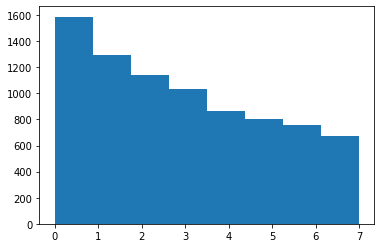

In [6]:
import matplotlib.pyplot as plt

plt.hist(targets, bins=8)

In [7]:
torch.save(targets, '../../data/wcep_train_targets.pt')

In [8]:
import torch
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import ProphetNetTokenizer

tokenizer = ProphetNetTokenizer.from_pretrained('microsoft/prophetnet-large-uncased')
vectorizer = TfidfVectorizer()

targets = []
for i in range(len(os.listdir('../../data/processed/wcep/text/validation'))):
    chunk = torch.load(f'../../data/processed/wcep/text/validation/chunk_{i}.pt', map_location=torch.device("cpu"))
    for cluster in chunk:
        text = tokenizer.batch_decode(cluster.input_ids[:, :256])
        X = vectorizer.fit_transform(text)
        targets.append(cosine_similarity(X).sum(1).argmax())

C:\Users\mikk5\anaconda3\envs\raffle\lib\site-packages\transformers\configuration_utils.py:353: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


(array([217., 151., 148., 106., 104.,  85.,  98.,  76.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

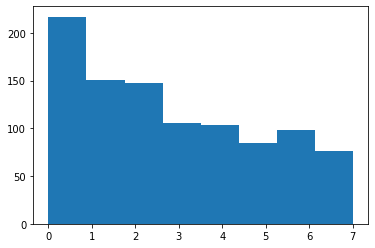

In [9]:
import matplotlib.pyplot as plt

plt.hist(targets, bins=8)

In [10]:
torch.save(targets, '../../data/wcep_validation_targets.pt')